Los geht's!


<IPython.core.display.Javascript object>


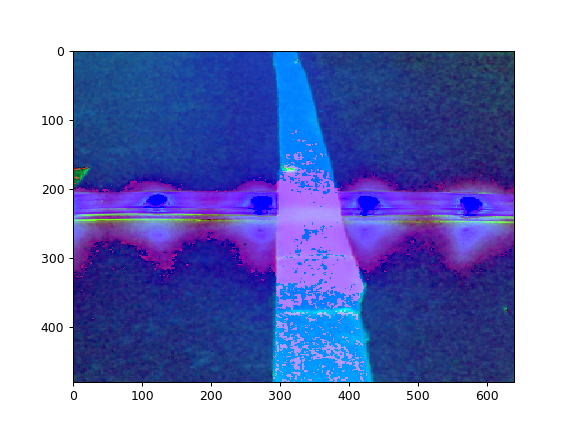

In [1]:
import numpy as np
import cv2
%matplotlib notebook
import matplotlib.pyplot as plt

#import mylib		#sucht mylib.py und führt es aus
#die Suche wird durchgeführt in:
#import sys
#sys.path



video_capture = cv2.VideoCapture(0)           # -1: zufällige Kamera auswählen 
#video_capture.set(3, 320)                    # Breite des Bildes festlegen
#video_capture.set(4, 240)                    # Höhe des Bildes festlegen

def cam(video_capture):
    
    a = 0
    b = 0
    
    ret, frame = video_capture.read()       # Video capturen

    img_rgb = frame[:, :, ::-1]             # richtige Farbdarstellung

    #crop_img = frame[240:480,0:640]

    hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_pink = np.array([10,0,0])                      
    upper_pink = np.array([170,180,254])
    
    mask_wrong = cv2.inRange(hsv_img, lower_pink, upper_pink)

    mask = cv2.bitwise_not(mask_wrong)
    
    zeile100 = mask[380, :]

    x = np.arange(zeile100.shape[0]) #x=0,1,2 ... N-1 (N=Bildbreite)
    point_of_gravity = (zeile100*x).sum() / zeile100.sum()


    if point_of_gravity <= 240:                                       # Auto positionieren (Linkskurve, Rechtskurve, Geradeausfahrt)
        a = "Linkskurve gebraucht!"
        
    elif point_of_gravity < 400 and point_of_gravity > 240:
        a = "Geradeausfahren!"
        
    elif point_of_gravity >= 400:
        a = "Rechtskurve gebraucht!"
    
    else:
        a = "Keine Linie gefunden!"
    
    lower_green = np.array([40,50,50])                      
    upper_green = np.array([65,255,255])
    
    mask_green = cv2.inRange(hsv_img, lower_green, upper_green)
    
    zeile100_green = mask_green[100, :]
    row_sum = zeile100_green.sum()
    
    if row_sum == 0:
        b = "Kein Grün vorhanden."
        
    else:
        b = "Los geht's!"   
    
    return [a, b, hsv_img]

#while(True):
    #direction, green = cam(video_capture)
    #print(direction)
    #print(green)

direction, start, picture = cam(video_capture)

print(start)


plt.figure()
#y = np.arange( mask.shape[0] ) #y=0,1,2 ... N-1 (N=Bildhöhe)
#plt.imshow(img_redness, cmap='gray')
plt.imshow(picture)
#plt.plot(points_of_gravity, y, '.', color='red')
